## Portfolio Assignment week 04
This first week of the *supervised* part of machine learning is focused on the mathematical background of creating models. Therefore, during this exercise you are required to program the complete technique of *gradient descent* by hand. Later, we will off course just use [sklearn SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html) for this.

Download and load the file `housing-data.txt`, which you can find on assemblix2019 (`/data/datasets/DS3/`). This is actually just random data, but for the sake of argument we will pretend it represents the prices of houses in Groningen as a function of their sizes. 

In [2]:
# import the general libraries
import yaml
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Load the data and create a scatter plot. As you will see, there seems to be a nice linear relationship between the size (on the horizontal axis) and the price (on the vertical axis).

I will use a configue file for this aim.

In [1]:
#inspired by https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml

def configReader():
    """
    explanation: This function open config,yaml file 
    and fetch the gonfigue file information
    input: ...
    output: configue file
    """
    with open("config.yaml", "r") as inputFile:
        config = yaml.safe_load(inputFile)
    return config

In [3]:
def dataframe_maker(config):
    file_directory, file_name = config.values()
    os.chdir(file_directory)
    df = pd.read_csv("housing-data.txt", sep=",")
    return df
df = dataframe_maker(configReader())
df.head()

,size,price
0,30.0,75.760161
1,31.0,81.662679
2,32.0,60.944950
3,33.0,67.890597
4,34.0,87.957014


In [25]:
def making_scatter_plot(df):
    #make the figure
    fig = plt.figure()

    plt.scatter(x = df['size'], y = df['price'], s=8)
    
    plt.title('House size vs House price')
    plt.xlabel('Size')
    plt.ylabel('Price')
    plt.show()

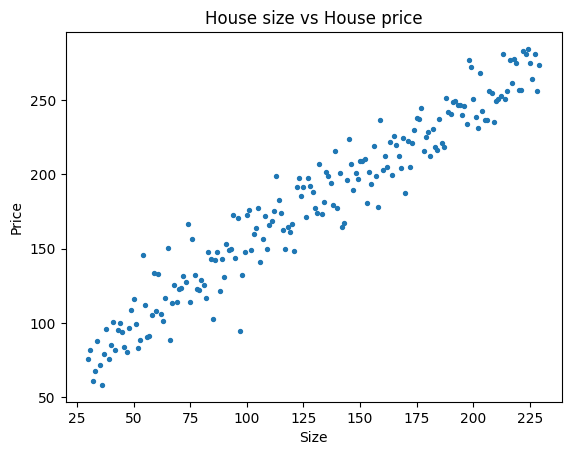

In [26]:
making_scatter_plot(df)

As we have discussed, the general formula for the cost of a model is as follows:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} ( h_\theta(x^{(i)}) - y^{(i)} ) ^2 
$$

2. Write a function `compute_cost` that receives a matrix `X` (of size $m \times n$), a vector `y` (of size $n \times 1$) and a vector `theta` (of size $n+1 \times 1$) and returns the total cost based on the formula above. For this to work correctly, you will need to add a column of 1's to the original `X`-matrix

When we call `compute-cost` with a value of `theta` of `[0,0]`, the total cost will probably be extremely high. In the next step, you need to update the values of this vector in order to minimize $J(\theta)$. 

As we have discussed, the technique we are using for this is *gradient descent*: every step of this descent, we update the values of `theta` as follows:

$$
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j
$$

3. Make a function `gradient_descent`, that receives the matrix `X`, the vectors `y` and `theta`, the learning curve `alpha` and a `num_iters`. In this method, performs `num_iters` steps of the gradient descent, calculating the cost $J(\theta)$ every step and storing that in a list. After the `num_iters`, this function needs to return the found value of `theta` and the list of all the costs.

4. Create a plot of the values of $J(\theta)$ that `compute_costs` has found. Do you see a decrease in the total costs?

